# DEEP NEURAL NETWORKS FROM SCRATCH 

#IMPORTING NECESSARY LIBRARIES

NUMPY IS USED FOR ALL MATHAMETICAL OPERATIONS 

MATPLOTLIB IS USED FOR VISUALIZATION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

THE NUMBER OF LAYERS AND ACTIVATIONS USED IN THOSE LAYERS ARE DESCRIBED IN A LIST CONTAINING KEY VALUE PAIRS.

In [1517]:
nn_architecture = [
    {"layer_size": 3, "activation": "none"}, # input layer
    {"layer_size": 6, "activation": "relu"},
    {"layer_size": 5, "activation": "relu"},
    {"layer_size": 1, "activation": "linear"}
]

THE INITIALIZATION FOR A DEEP L-LAYERED NEURAL NETWORK IS EXECUTED AND IT CONTAINS WEIGHT MATRICES AND BIAS VECTORS.

WEIGHT MATRICES ARE INITIALIZED FOR ALL LAYERS BY CONSIDERING THE NUMBER OF NEURONS IN THE PREVIOUS AND CURRENT LAYER.
BIAS VECTORS ARE INITIALIZED BY CONSIDERING ONLY THE NUMBER OF NEURONS IN THE CURRENT LAYER.
THE BIAS VECTORS ARE INITIALIZED TO ZEROES.


In [1468]:
def initialize_parameters(nn_architecture, seed = 60):
    np.random.seed(seed)
    # python dictionary containing our parameters "W1", "b1", ..., "WL", "bL"
    parameters = {}
    number_of_layers = len(nn_architecture)

    for l in range(1, number_of_layers):
        parameters['W' + str(l)] = np.random.randn(nn_architecture[l]["layer_size"],nn_architecture[l-1]["layer_size"])*0.1
        parameters['b' + str(l)] = np.zeros((nn_architecture[l]["layer_size"], 1))
        
    return parameters
    

# Weight matrix and Bias vectors for each layer 

In [1371]:
initialize_parameters(nn_architecture)

{'W1': array([[-9.21770993e-02, -5.86317634e-02,  1.16399914e-01],
        [-1.24172396e-01, -1.98523022e-01,  1.30670891e-01],
        [ 7.37807059e-02,  3.79111282e-02,  9.89200864e-05],
        [-1.10503482e-01, -9.43307177e-02, -7.20370427e-02],
        [ 2.28128940e-01,  3.49672691e-03, -6.74568670e-02],
        [ 2.18137822e-02,  1.16688402e-01,  2.80148303e-02]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.05608528,  0.00576144,  0.02650429, -0.22109676, -0.00286614,
         -0.02634928],
        [ 0.13120904,  0.09433981,  0.0839761 , -0.07795373,  0.00382895,
          0.05139817],
        [-0.00042382, -0.28132426, -0.07387946,  0.1119412 ,  0.03860523,
         -0.10970752],
        [ 0.12080457,  0.05912429,  0.00603911,  0.05287602,  0.1974946 ,
         -0.03043879],
        [ 0.11188679,  0.09321451,  0.08282396,  0.00262975, -0.09972103,
         -0.21314479]]),
 'b2': array([[0.],
        [0.],
       

# ACTIVATION FUNCTIONS AND THEIR DERIVATIVES

ACTIVATION FUNCTIONS GIVE THE NETWORK NON-LINEARITY.

ACTIVATION FUNCTIONS ARE USED IN FEED FORWARD AND THEIR CORRESPONDING DERIVATIVES ARE USED IN BACK PROPAGATION.

In [1519]:
def sigmoid(Z):
    S = 1/ (1+ np.exp(-Z))
    return S
def relu(Z):
    R = np.maximum(0,Z)
    return R
def tanh(Z):
    T = (np.exp(Z) - np.exp(-Z))/(np.exp(Z) + np.exp(-Z))
    return T
def linear(Z):
    return Z


def sigmoid_backward(dA, Z):
    S = sigmoid(Z)
    dS = S * (1 - S)
    return dA * dS

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    return dZ

def tanh_backward(dA,Z):
    dT = 1 - (tanh(Z))**2
    return dA*dT

def lin_backward(dA,Z):
    return dA
    

# FEED FORWARD MODEL

During feed forward propagation, in the forward function for a layer L we need to know what the activation function in a layer is (Sigmoid, tanh, ReLU, etc.).
Given input signal from the previous layer, we compute Z and then apply selected activation function.

Z for each neuron is calculated by Multiplying the weight matrix with their previous layer's output and adding the bias vector to it.

Z = W.T*X + B

where W.T is weight matrix transpose
X is the input and B is the bias vector

For the first layer we take input vector and multiply it with the weight matrix and then add it with the bias vector.

A for each neuron is found by applying the corresponding layers's signal function to Z.

for eample A = relu(Z.

In [3]:
def L_model_forward(X, parameters, nn_architecture):
    forward_cache = {}
    A = X
    number_of_layers = len(nn_architecture)
    A = np.array([A]).T
    for l in range(1, number_of_layers):
        A_prev = A 
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        activation = nn_architecture[l]["activation"]
        Z, A = linear_activation_forward(A_prev, W, b, activation)
        forward_cache['Z' + str(l)] = Z
        forward_cache['A' + str(l)] = A
        
    AL2 = A
           
    return AL2, forward_cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z = linear_forward(A_prev, W, b)
        A = sigmoid(Z)
    elif activation == "relu":
        Z = linear_forward(A_prev, W, b)
        A = relu(Z)
    elif activation == "tanh":
        Z = linear_forward(A_prev, W, b)
        A = tanh(Z)
    elif activation == "linear":
        Z = linear_forward(A_prev, W, b)
        A = linear(Z)
    elif activation == "softmax":
        Z = linear_forward(A_prev, W, b)
        A = softmax(Z)

    return Z, A

def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    return Z

# Cost Function

WE USE 2 TYPE OF COST FUNCTIONS

1. CROSSENTROPY FOR CLASSIFICATION
       
2. MEAN SQUARED ERROR FOR REGRESSION

In [1470]:
def compute_cost(AL, Y ,loss_fn):
    
    # Compute loss from AL and y
    if loss_fn == "cross_entropy":
        # cross-entropy cost
        logprobs = np.multiply(np.log(AL),Y) + np.multiply(1 - Y, np.log(1 - AL))
        cost = -1*logprobs #/ m
    elif loss_fn == "mse":
        cost = ([Y] - AL)**2 
    #cost = np.squeeze(cost)

    return cost

# Backward Propagation 

Backpropagation is used to calculate the gradient of the loss function with respect to the parameters. This algorithm is the recursive use of a “chain rule” known from differential calculus.

The first step in backpropagation for our neural network model is to calculate the derivative of our loss function with respect to Z from the last layer. 

The derivative of the loss function with respect to the activation function from the last layer.

The derivative of the loss function with respect to Z from lᵗʰ layer helps to calculate the derivative of the loss function with respect to A from (l-1)ᵗʰ layer (the previous layer). 

Then the result is used with the derivative of the activation function.

In [1516]:
def L_model_backward(AL, Y, parameters, forward_cache, nn_architecture,X,loss_fn):
    grads = {}
    number_of_layers = len(nn_architecture)
    # Initializing the backpropagation
    
    if loss_fn == "mse":
        dAL = 2 *([Y] - AL)*-1 
    elif loss_fn == "cross_entropy":
        dAL =  - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    dA_prev = dAL
    for l in reversed(range(1, number_of_layers)):
        dA_curr = dA_prev
        activation = nn_architecture[l]["activation"]
        W_curr = parameters['W' + str(l)]
        Z_curr = forward_cache['Z' + str(l)]
        if l != 1:
            A_prev = forward_cache['A' + str(l-1)] 
        else:
            A_prev = np.array([X]).T
    
        dA_prev, dW_curr, db_curr = linear_activation_backward(dA_curr, Z_curr, A_prev, W_curr, activation)

        
        grads["dW" + str(l)] = dW_curr
        grads["db" + str(l)] = db_curr
        
    return grads

def linear_activation_backward(dA, Z, A_prev, W, activation):
    if activation == "relu":
        dZ = relu_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)
    elif activation == "tanh":
        dZ = tanh_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)
    elif activation == "linear":
        dZ = lin_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)
    elif activation == "softmax":
        dZ = softmax_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)

    return dA_prev, dW, db

def linear_backward(dZ, A_prev, W):
    
    dW = np.dot(dZ,A_prev.T) # /m
    db = np.sum(dZ, axis=1, keepdims=True) # /m
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db


# Weight Updation

The goal of the function is to update the parameters of the model using gradient optimization.
The weights and biases are updated after each iteration by Stochastic Gradient Descent Method


In [1485]:
def update_parameters(parameters, grads, learning_rate):
    lr = learning_rate
    L = len(parameters) // 2 # number of layers in the neural network
    
    for l in range(1, L):
        parameters["W" + str(l)] = parameters["W" + str(l)] - lr * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - lr * grads["db" + str(l)]
    
    return parameters

# Full Model

The full implementation of the neural network model consists of the methods provided below.

Hyperparameters
1. ARCHITECTURE - Number of layers and their activations
2. LEARNING RATE
3. NUMBER OF ITERATIONS
4. LOSS FUNCTION

The model attains good accuracy and low cost by tweaking these hyperparameters.

We use only Stochastic Gradient Descent(SGD) as our optimizer.

In [1486]:
def L_layer_model(X, Y, nn_architecture, loss_fn = "mse", learning_rate = 1.5 , num_iterations = 200, print_cost=True):
    np.random.seed(56) 
    
    costs = []
    # Parameters initialization.
    parameters = initialize_parameters(nn_architecture)
    
    for i in range(0, num_iterations):
        
            for j in range(0,len(X)):
                X[j] = np.array(X[j])
                # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
                AL1, forward_cache =  L_model_forward(X[j], parameters, nn_architecture)
                #print(AL1 , Y[j])   
                cost = compute_cost(AL1, Y[j],loss_fn)
                #    cost1.append(cose)
                # Backward propagation.
            
                grads = L_model_backward(AL1, Y[j], parameters, forward_cache, nn_architecture,X[j],loss_fn)
            
                # Update parameters.
                parameters = update_parameters(parameters, grads, learning_rate)
                  
            # Print the cost every 100 training example
            if print_cost and i % 10 == 0:
                print("Cost after iteration %i: %f" %(i, cost))

            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    print(costs)
    return parameters

# VISUALIZATION

Cost after iteration 0: 0.119615
Cost after iteration 10: 0.227601
Cost after iteration 20: 0.169953
Cost after iteration 30: 0.135932
Cost after iteration 40: 0.116986
Cost after iteration 50: 0.105601
Cost after iteration 60: 0.097098
Cost after iteration 70: 0.097106
Cost after iteration 80: 0.097098
Cost after iteration 90: 0.099540
Cost after iteration 100: 0.097101
Cost after iteration 110: 0.097098
Cost after iteration 120: 0.097101
Cost after iteration 130: 0.097098
Cost after iteration 140: 0.097098
Cost after iteration 150: 0.097098
Cost after iteration 160: 0.097098
Cost after iteration 170: 0.099756
Cost after iteration 180: 0.097098
Cost after iteration 190: 0.097098


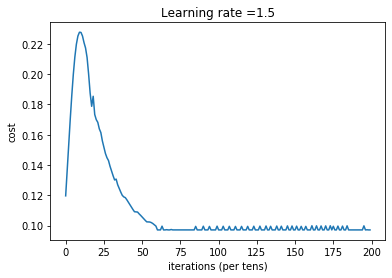

[array([[0.11961536]]), array([[0.13691605]]), array([[0.1538153]]), array([[0.17036677]]), array([[0.18597727]]), array([[0.19987417]]), array([[0.21129748]]), array([[0.21976976]]), array([[0.22518286]]), array([[0.2276988]]), array([[0.22760083]]), array([[0.22520064]]), array([[0.22082342]]), array([[0.21729171]]), array([[0.21101472]]), array([[0.2000889]]), array([[0.18749086]]), array([[0.17876381]]), array([[0.18539011]]), array([[0.17333753]]), array([[0.16995331]]), array([[0.16817519]]), array([[0.16385809]]), array([[0.16141971]]), array([[0.15587561]]), array([[0.15158834]]), array([[0.14759246]]), array([[0.14479903]]), array([[0.14292367]]), array([[0.13915785]]), array([[0.13593175]]), array([[0.13291966]]), array([[0.13010392]]), array([[0.13067264]]), array([[0.12694872]]), array([[0.12444662]]), array([[0.12212511]]), array([[0.11995203]]), array([[0.11890859]]), array([[0.11842826]]), array([[0.11698564]]), array([[0.11537564]]), array([[0.11370999]]), array([[0.112

{'W1': array([[-0.10211727, -0.07012627,  0.09372604],
        [-0.1312673 , -0.20088799,  0.11648108],
        [ 0.05919873,  0.53893026, -0.39022494],
        [-0.11050348, -0.09433072, -0.07203704],
        [ 0.4250404 ,  2.92498982, -2.22030831],
        [ 0.09327013,  0.69178722, -0.47820004]]), 'b1': array([[-0.02850581],
        [-0.01606655],
        [ 0.0407343 ],
        [ 0.        ],
        [ 0.3508596 ],
        [ 0.04331957]]), 'W2': array([[ 5.50018495e-02,  5.12616437e-03,  2.57839555e-02,
         -2.21096759e-01, -4.80359556e-03, -2.71940982e-02],
        [ 1.31209035e-01,  9.43398144e-02,  3.30720555e-01,
         -7.79537303e-02,  1.11992915e+00,  3.56451654e-01],
        [-4.23819862e-04, -2.81324264e-01, -7.37382290e-02,
          1.11941195e-01,  3.40282165e-02, -1.09917184e-01],
        [ 1.16411216e-01,  5.49577082e-02,  3.95114317e-01,
          5.28760214e-02,  2.21957752e+00,  4.96133872e-01],
        [ 1.11886785e-01,  9.29822111e-02,  8.28239570e-02,
    

In [1480]:
L_layer_model(X_M,Y_M,nn_architecture)

In [1498]:
X1 = [0,0,0,0,1,1,1,1]
X2 = [0,0,1,1,0,0,1,1]
X3 = [0,1,0,1,0,1,0,1]
Y1 = [1,1,1,1,1,1,1,0]
Y2 = [0,0,0,0,0,0,0,1]
df = pd.DataFrame({"A": X1, "B": X2 , "C": X3,"Y1":Y1, "Y2":Y2})
X = df.iloc[:,0:3]
Y = df.iloc[:,3:5]

# TESTING THE MODEL EFFECIENCY BY USING DIFFERENT MATHEMATICAL FUNCTIONS

In [1497]:
df = pd.DataFrame({"A": X1, "B": X2 , "C": X3})
df['Y']=np.sin(df['A'].values)+ np.cos(df['B'].values)+np.tan(df['C'].values)
df

,A,B,C,Y
0,0,0,0,1.000000
1,0,0,1,2.557408
2,0,1,0,0.540302
3,0,1,1,2.097710
4,1,0,0,1.841471
5,1,0,1,3.398879
6,1,1,0,1.381773
7,1,1,1,2.939181


In [1451]:

from sklearn.preprocessing import StandardScaler,Normalizer
no = Normalizer()
sc = StandardScaler()
df = no.fit_transform(df)
df1 = pd.DataFrame(df)
X = df1.iloc[:,0:3]
Y = df1.iloc[:,3:4]

# TRYING FOR DIFFERENT DATASETS

In [1499]:
X_M = np.array(X)
Y_M = np.array(Y)


In [1500]:
X_M.shape,Y_M.shape

((8, 3), (8, 2))

In [1501]:
X_M , Y_M

(array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]], dtype=int64), array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1]], dtype=int64))

Cost after iteration 0: 0.119615
Cost after iteration 10: 0.227601
Cost after iteration 20: 0.169953
Cost after iteration 30: 0.135932
Cost after iteration 40: 0.116986
Cost after iteration 50: 0.105601
Cost after iteration 60: 0.097098
Cost after iteration 70: 0.097106
Cost after iteration 80: 0.097098
Cost after iteration 90: 0.099540


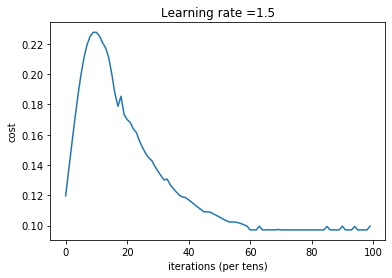

[array([[0.11961536]]), array([[0.13691605]]), array([[0.1538153]]), array([[0.17036677]]), array([[0.18597727]]), array([[0.19987417]]), array([[0.21129748]]), array([[0.21976976]]), array([[0.22518286]]), array([[0.2276988]]), array([[0.22760083]]), array([[0.22520064]]), array([[0.22082342]]), array([[0.21729171]]), array([[0.21101472]]), array([[0.2000889]]), array([[0.18749086]]), array([[0.17876381]]), array([[0.18539011]]), array([[0.17333753]]), array([[0.16995331]]), array([[0.16817519]]), array([[0.16385809]]), array([[0.16141971]]), array([[0.15587561]]), array([[0.15158834]]), array([[0.14759246]]), array([[0.14479903]]), array([[0.14292367]]), array([[0.13915785]]), array([[0.13593175]]), array([[0.13291966]]), array([[0.13010392]]), array([[0.13067264]]), array([[0.12694872]]), array([[0.12444662]]), array([[0.12212511]]), array([[0.11995203]]), array([[0.11890859]]), array([[0.11842826]]), array([[0.11698564]]), array([[0.11537564]]), array([[0.11370999]]), array([[0.112

{'W1': array([[-0.10211727, -0.07012627,  0.09372604],
        [-0.1312673 , -0.20088799,  0.11648108],
        [ 0.05574233,  0.43205455, -0.36321294],
        [-0.11050348, -0.09433072, -0.07203704],
        [ 0.34323244,  2.43817091, -2.10051049],
        [ 0.07138552,  0.56512901, -0.4543886 ]]), 'b1': array([[-0.02850581],
        [-0.01606655],
        [ 0.04593482],
        [ 0.        ],
        [ 0.52944356],
        [ 0.04833503]]), 'W2': array([[ 5.50018495e-02,  5.12616437e-03,  2.57839555e-02,
         -2.21096759e-01, -4.80359556e-03, -2.71940982e-02],
        [ 1.31209035e-01,  9.43398144e-02,  1.74446443e-01,
         -7.79537303e-02,  4.21145199e-01,  1.57298458e-01],
        [-4.23819862e-04, -2.81324264e-01, -7.25379560e-02,
          1.11941195e-01,  4.35294406e-02, -1.08101856e-01],
        [ 1.16411216e-01,  5.49577082e-02,  3.88092247e-01,
          5.28760214e-02,  2.25141586e+00,  4.95693770e-01],
        [ 1.11886785e-01,  9.29822111e-02,  8.28239570e-02,
    

In [1475]:
L_layer_model(X_M,Y_M,nn_architecture)

# COMPARING WITH THE INBUILT CODE USING TENSORFLOW

In [1434]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [1445]:
c = Sequential()
c.add(Dense(units = 6,activation = "relu"))
c.add(Dense(units = 5,activation = "relu"))
c.add(Dense(units = 1,activation = "linear"))

In [1446]:
opt = SGD(lr=1.5)
c.compile(optimizer=opt,loss='mse')
c.fit(X_M,Y_M,epochs = 20)

Train on 8 samples
Epoch 1/20
8/8 [==============================] - 1s 66ms/sample - loss: 1.4482
Epoch 2/20
8/8 [==============================] - 0s 499us/sample - loss: 1.3592
Epoch 3/20
8/8 [==============================] - 0s 624us/sample - loss: 0.5926
Epoch 4/20
8/8 [==============================] - 0s 499us/sample - loss: 0.2586
Epoch 5/20
8/8 [==============================] - 0s 249us/sample - loss: 0.1132
Epoch 6/20
8/8 [==============================] - 0s 748us/sample - loss: 0.0498
Epoch 7/20
8/8 [==============================] - 0s 385us/sample - loss: 0.0222
Epoch 8/20
8/8 [==============================] - 0s 440us/sample - loss: 0.0102
Epoch 9/20
8/8 [==============================] - 0s 374us/sample - loss: 0.0049
Epoch 10/20
8/8 [==============================] - 0s 374us/sample - loss: 0.0027
Epoch 11/20
8/8 [==============================] - 0s 374us/sample - loss: 0.0017
Epoch 12/20
8/8 [==============================] - 0s 873us/sample - loss: 0.0012
Epoch 1

In [1424]:
X_M  , Y_M

(array([[0.13608276, 0.54433105, 0.13608276],
        [0.20628425, 0.51571062, 0.10314212],
        [0.24828177, 0.08276059, 0.49656353],
        [0.37463432, 0.09365858, 0.37463432],
        [0.10783277, 0.64699664, 0.        ],
        [0.34299717, 0.34299717, 0.17149859],
        [0.46423835, 0.09284767, 0.27854301],
        [0.31622777, 0.42163702, 0.10540926]]), array([[0.81649658],
        [0.825137  ],
        [0.82760589],
        [0.84292723],
        [0.75482941],
        [0.85749293],
        [0.83562902],
        [0.84327404]]))